In [2]:
# This is a sample Python script.

# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# 

# La clase usuario crea de manera pseudoaleatoria un username compuesto por tres partes:
# sistema operativo, environment y país
class Usuario:
    lista_os = ["L"]*4 + ["S"]*3 + ["A"]*2 + ["H"]
    lista_env = ["D"]*10 + ["I"]*10 + ["T"]*25 + ["S"]*25 + ["P"]*30
    lista_land = ["NOR"]*6 + ["FRA"]*9 + ["ITA"]*16 + ["ESP"]*16 + ["DEU"]*23 + ["IRL"]*30
    def __init__(self):
        self.caracteristicas = ""
        self.caracteristicas += self.lista_os[random.randint(0, 9)]
        self.caracteristicas += self.lista_env[random.randint(0, 99)]
        self.caracteristicas += self.lista_land[random.randint(0, 99)]

    def get_os(self) -> str:
        # TODO

        if self.caracteristicas[0] == "L":
            return "Linux"
        elif self.caracteristicas[0] == "S":
            return "Solaris"
        elif self.caracteristicas[0] == "A":
            return "AIX"
        elif self.caracteristicas[0] == "H":
            return "HP-UX"
        else:
            return "Unknown"

    # Devuelve lista de los Environments de users
    def get_environment(self) -> str:
        # TODO
        if self.caracteristicas[1] == "D":
            return 'Development'
        elif self.caracteristicas[1] == "I":
            return 'Integration'
        elif self.caracteristicas[1] == "T":
            return "Testing"
        elif self.caracteristicas[1] == "S":
            return "Staging"
        elif self.caracteristicas[1] == "P":
            return "Production"

        else:
            return "Unknown"

    # Devuelve lista de los países de users
    def get_country(self) -> str:
        # TODO
        if self.caracteristicas[2:5] == "NOR":
            return "Norway"
        elif self.caracteristicas[2:5] == "DEU":
            return "Germany"
        elif self.caracteristicas[2:5] == "ITA":
            return "Italy"
        elif self.caracteristicas[2:5] == "ESP":
            return "Spain"
        elif self.caracteristicas[2:5] == "IRL":
            return "Ireland"
        elif self.caracteristicas[2:5] == "FRA":
            return "France"
        else:
            return "Unknown"

    #No era parte de la tarea pero al ver la documentación me pareció interesante incluirlo
    def __str__(self):
        return "user: "+ self.caracteristicas +"\n" +"Sistema operativo: "+ \
                     self.get_os() + "\n" + "Environment: "+self.get_environment() + "\n" + "País: "+ self.get_country()


#La clase PP toma como argumento el integer "cantidad", está compuesta por el atributo "users" el cual actúa como
# una lista de usuarios. La clase también contiene la lista vacía "dataset" y el dataframe "df" los cuales se
# inicializan vacío y como None inicialmente para ser posteriormente alterados. Al final de la clase
# hay dos métodos que crean gráficos
class PP:
    # Constructor crea obj de listas vacías. Users es la lista final, OS;Env y Land van a construir Users
    # int cantidadserá el len de la lista final
    def __init__(self, cantidad: int):
        self.cantidad = cantidad
        self.users = []
        self.create_users(cantidad)

        self.dataset = []
        self.df = None

    def create_users(self, cantidad: int):
        lista_alpha = []
        for i in range(cantidad):
            user = Usuario().caracteristicas
            lista_alpha.append(user)
            cuenta= lista_alpha.count(user)
            if cuenta >= 999:
                cuenta = str(999)
            else:
                cuenta = str(cuenta).zfill(3)

            self.users.append(user+cuenta)
    def get_users(self):
        return self.users

    # Devuelve lista de los OS de users
    def get_os(self) -> str:
        # TODO

        limpio = []
        for sucio in self.users:
            if sucio[0] == "L":
                limpio.append("Linux")
            elif sucio[0] == "S":
                limpio.append("Solaris")
            elif sucio[0] == "A":
                limpio.append("Aix")
            elif sucio[0] == "H":
                limpio.append("HP-UX")
            else:
                limpio.append("Unknown")

        return limpio

    # Devuelve lista de los Environments de users
    def get_environment(self) -> str:
        # TODO
        limpio = []

        for sucio in self.users:
            if sucio[1] == "D":
                limpio.append("Development")
            elif sucio[1] == "I":
                limpio.append("Integration")
            elif sucio[1] == "T":
                limpio.append("Testing")
            elif sucio[1] == "S":
                limpio.append("Staging")
            elif sucio[1] == "P":
                limpio.append("Production")

            else:
                limpio.append("Unknown")

        return limpio

    # Devuelve lista de los países de users
    def get_country(self) -> str:
        # TODO
        limpio = []

        for sucio in self.users:

            if sucio[2:5] == "NOR":
                limpio.append("Norway")
            elif sucio[2:5] == "DEU":
                limpio.append("Germany")
            elif sucio[2:5] == "ITA":
                limpio.append("Italy")
            elif sucio[2:5] == "ESP":
                limpio.append("Spain")
            elif sucio[2:5] == "IRL":
                limpio.append("Ireland")
            elif sucio[2:5] == "FRA":
                limpio.append("France")
            else:
                limpio.append("Unknown")

        return limpio

    # Método no solicitado, pero al verla en la documentación de POO me dio curiosidad y quise intentarlo.
    def __str__(self):
        parte_os = np.array(self.get_os())
        parte_env = np.array(self.get_environment())
        parte_land = np.array(self.get_country())
        parte_num = [w[5:8] for w in self.users]


        parte_os = np.char.add(parte_os, " ")
        parte_env = np.char.add(parte_env, " ")
        parte_os_env = np.char.add(parte_os, parte_env)

        parte_os_env_land = np.char.add(parte_os_env, parte_land)
        parte_os_env_land = np.char.add(parte_os_env_land, " ")

        parte_os_env_land_num = np.char.add(parte_os_env_land, parte_num)
        parte_os_env_land_num = np.char.add(parte_os_env_land_num,", \n ")

        return ' '.join(parte_os_env_land_num)

    # genero una lista de diccionarios con las cualidades de cada user para convertirlo en dataframe de Pandas
    def set_dataframe(self):
        # TODO
        lista_users = self.users
        lista_os = self.get_os()
        lista_env = self.get_environment()
        lista_country = self.get_country()

        for i in range(len(self.users)):
            dicc_temporal = {}
            dicc_temporal["hostname"] = lista_users[i]
            dicc_temporal["os"] = lista_os[i]
            dicc_temporal["environment"] = lista_env[i]
            dicc_temporal["country"] = lista_country[i]
            node = self.users[i]
            node = node[5:8]
            dicc_temporal["node"] = int(node)
            self.dataset.append(dicc_temporal)
            

        self.df = pd.DataFrame(self.dataset)

        return self.df

        #return self.df

    # Crea el bar plot pedido y eleva una excepción si self.df es aún None
    #Elevar una excepción no era parte de la tarea. Pero la documentación adicional lo explicaba y me
    #pareció interesante incluirlo.
    def grafico_env_per_country(self):
        plt.rcParams['figure.figsize'] = [16, 8]
        try:
            self.df.groupby(['country', 'environment']).size().unstack().plot(kind="bar")
            return plt.show()
        except KeyError:
            print("la función grafico_env_per_country() no se puede ejecutar con un dataframe vacío")
        except AttributeError:
            print("es necesario llamar al método set_dataframe() antes de crear un gráfico")


    #También sigue el formato try-except del método pasado.
    def grafico_resumen(self):
        try:
            fig, axs = plt.subplots(2, 2)

            # primer gráfico
            #-----------------------------------------------------------------------------------------------
            self.df.groupby(['country', 'os']).size().unstack().plot(kind="barh",
                                                                     ax=axs[0, 0])
            axs[0, 0].set_title("Type of OS grouped by country")

            # Segundo gráfico
            # -----------------------------------------------------------------------------------------------
            df_para_Pie = pd.DataFrame(self.df.groupby(['os']).size())
            df_para_Pie.reset_index(inplace=True)
            df_para_Pie.columns = ["os", "cantidad"]
            df_para_Pie["porcentaje"] = df_para_Pie["cantidad"] / df_para_Pie["cantidad"].sum()

            axs[0, 1].pie(df_para_Pie['cantidad'], labels=df_para_Pie['cantidad'])

            L = axs[0, 1].legend()
            L.set_bbox_to_anchor((1, 1))

            for index, row in df_para_Pie.iterrows():
                primero = row["os"]
                segundo = str(round(row["porcentaje"], ndigits=4))
                L.get_texts()[index].set_text(primero + " (" + segundo + "%" + ")")


            axs[0, 1].set_title("Total Operating Systems")

            # tercer gráfico
            # -----------------------------------------------------------------------------------------------

            df_Host_per_Country = pd.DataFrame(self.df.value_counts("country"))
            # df_Host_per_Country.reset_index(inplace = True)
            df_Host_per_Country.columns = ["number of hosts"]

            # df_Host_per_Country.plot(kind = "barh",ax = axs[1,0],legend = False)

            df_Host_per_Country.reset_index(inplace=True)
            df_Host_per_Country.sort_values('number of hosts', ascending=True, inplace=True)

            sns.barplot(x="number of hosts", y="country",
                        data=df_Host_per_Country,
                        ax=axs[1, 0],
                        palette="YlGn")

            for index, value in enumerate(df_Host_per_Country["number of hosts"]):
                axs[1, 0].text(value, index,
                               str(value))

            axs[1, 0].set_xlim(0, df_Host_per_Country['number of hosts'].max() + 100)
            axs[1, 0].set_ylabel('Country')
            axs[1, 0].set_title("Total hosts by country")

            # Cuarto gráfico
            # -----------------------------------------------------------------------------------------------
            df_cuarto = self.df.groupby(["country", "environment"]).size().unstack(0).plot(kind="bar",
                                                                                           ax=axs[1, 1])

            axs[1,1].legend(loc='upper left')
            axs[1, 1].set_ylabel('Number of Hosts')
            axs[1, 1].set_title("Hosts by Country grouped by environment")

            fig.tight_layout()
            
            plt.rcParams['figure.figsize'] = [27, 15]

            return plt.show()
        except KeyError:
            print("la función grafico_resumen() no se puede ejecutar con un dataframe vacío")
        except AttributeError:
            print("es necesario llamar al método set_dataframe() antes de crear un gráfico")

In [49]:
#Función que genera los hostnames es la clase Usuario
primer_usuario = Usuario()
print(primer_usuario) #Usa el método __str__ me pareció interesante incluirlo
print(primer_usuario.get_os(),primer_usuario.get_environment(),primer_usuario.get_country())


#Se puede lograr un resultado similar llamando a PP(1) pero los métodos devuelven listas en ese caso
#Si hago que si len(lista de usuarios) == 1 devolviese string en vez de lista traería problemas
#a la hora de llamar a set_dataframe()

unHostName = PP(1)
print(unHostName.get_users(),unHostName.get_os(),unHostName.get_environment(),unHostName.get_country())
print(unHostName)

user: LPIRL
Sistema operativo: Linux
Environment: Production
País: Ireland
Linux Production Ireland
['AIDEU001'] ['Aix'] ['Integration'] ['Germany']
Aix Integration Germany 001, 
 


In [50]:
#Función que genera dataframe, se guarda en csv y se muestra:
Demo_set_dataframe = PP(1500)
#print(Demo_set_dataframe)
Demo = Demo_set_dataframe.set_dataframe()

print(Demo)

      hostname       os  environment  country  node
0     LTITA001    Linux      Testing    Italy     1
1     STDEU001  Solaris      Testing  Germany     1
2     LPIRL001    Linux   Production  Ireland     1
3     SDDEU001  Solaris  Development  Germany     1
4     LIESP001    Linux  Integration    Spain     1
...        ...      ...          ...      ...   ...
1495  SPIRL048  Solaris   Production  Ireland    48
1496  STIRL037  Solaris      Testing  Ireland    37
1497  HDIRL002    HP-UX  Development  Ireland     2
1498  STITA019  Solaris      Testing    Italy    19
1499  LTDEU030    Linux      Testing  Germany    30

[1500 rows x 5 columns]


In [51]:
#Función que genera primer gráfico
#Para ambas funciones de gráficos apliqué lo aprendido en la documentación adicional de excepciones
demo_grafico1 = PP(0)
demo_grafico1.grafico_env_per_country()

es necesario llamar al método set_dataframe() antes de crear un gráfico


In [52]:
demo_grafico1.set_dataframe()
demo_grafico1.grafico_env_per_country()

la función grafico_env_per_country() no se puede ejecutar con un dataframe vacío


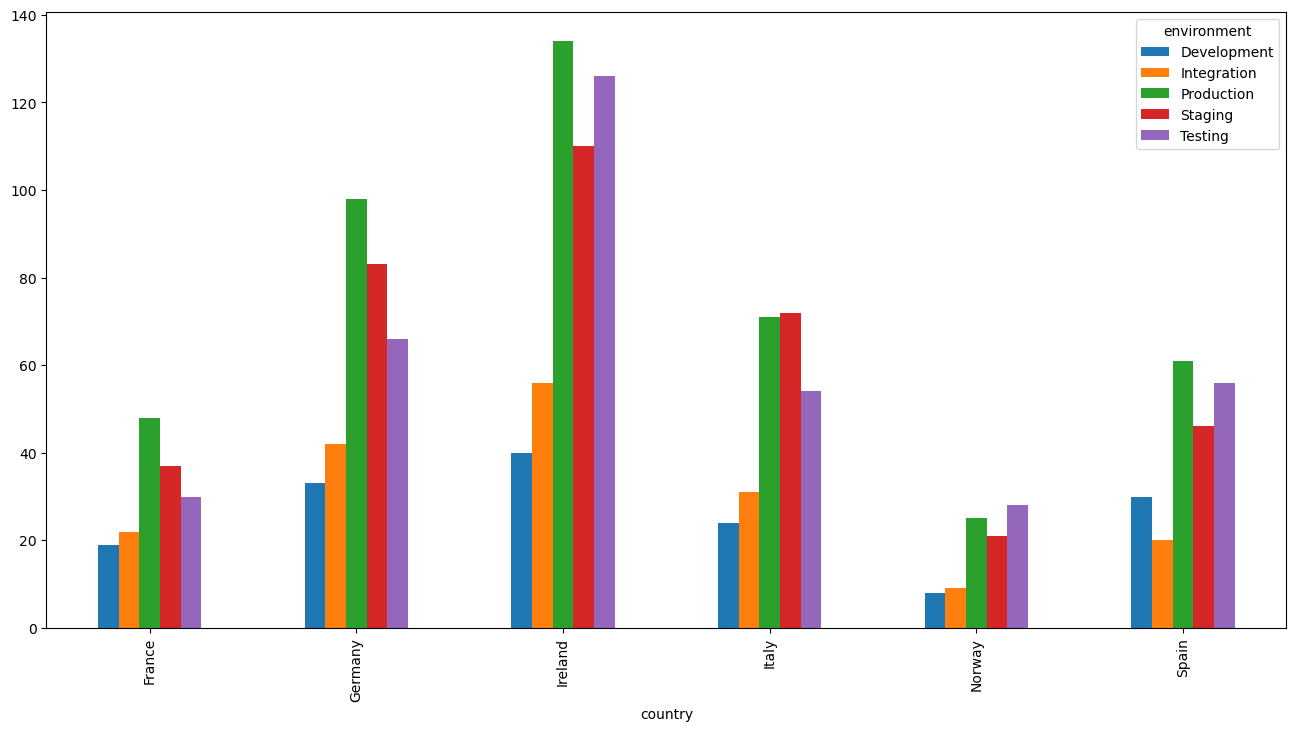

In [53]:
demo_grafico1 = PP(1500)
demo_grafico1.set_dataframe()
demo_grafico1.grafico_env_per_country()

es necesario llamar al método set_dataframe() antes de crear un gráfico


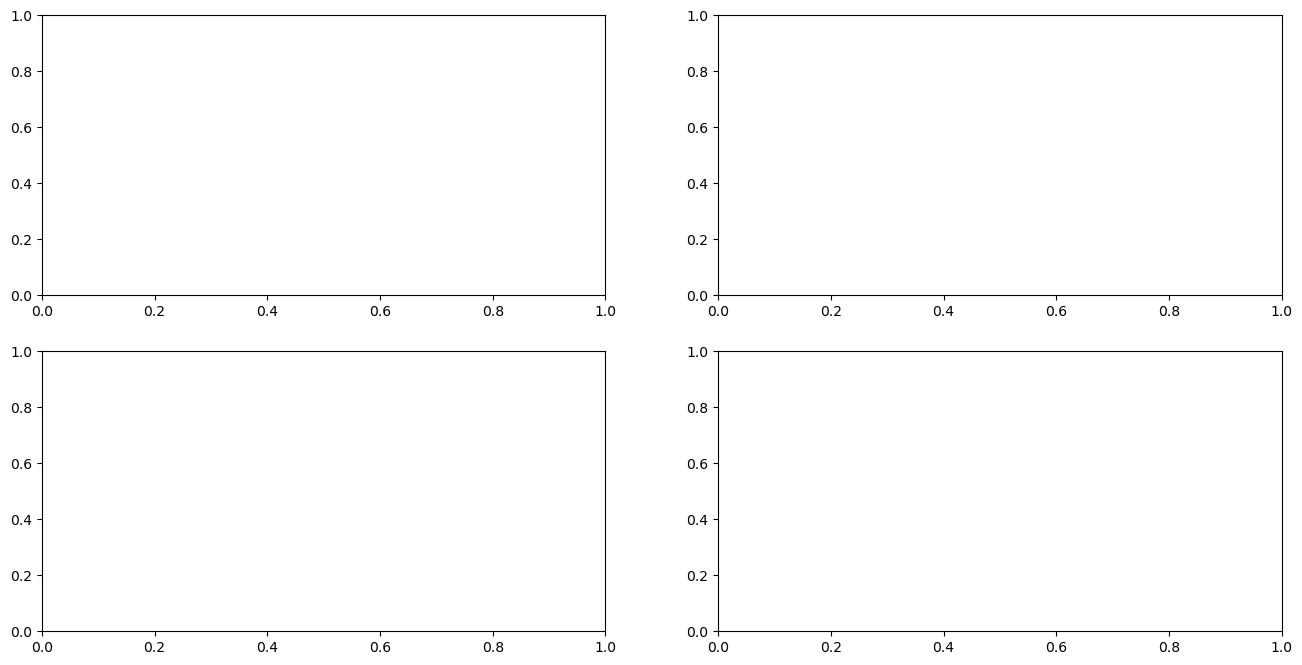

In [54]:
# Función que genera segundo gráfico
# Para ambas funciones de gráficos apliqué lo aprendido en la documentación adicional de excepciones
demo_grafico2 = PP(0)
demo_grafico2.grafico_resumen()

la función grafico_resumen() no se puede ejecutar con un dataframe vacío


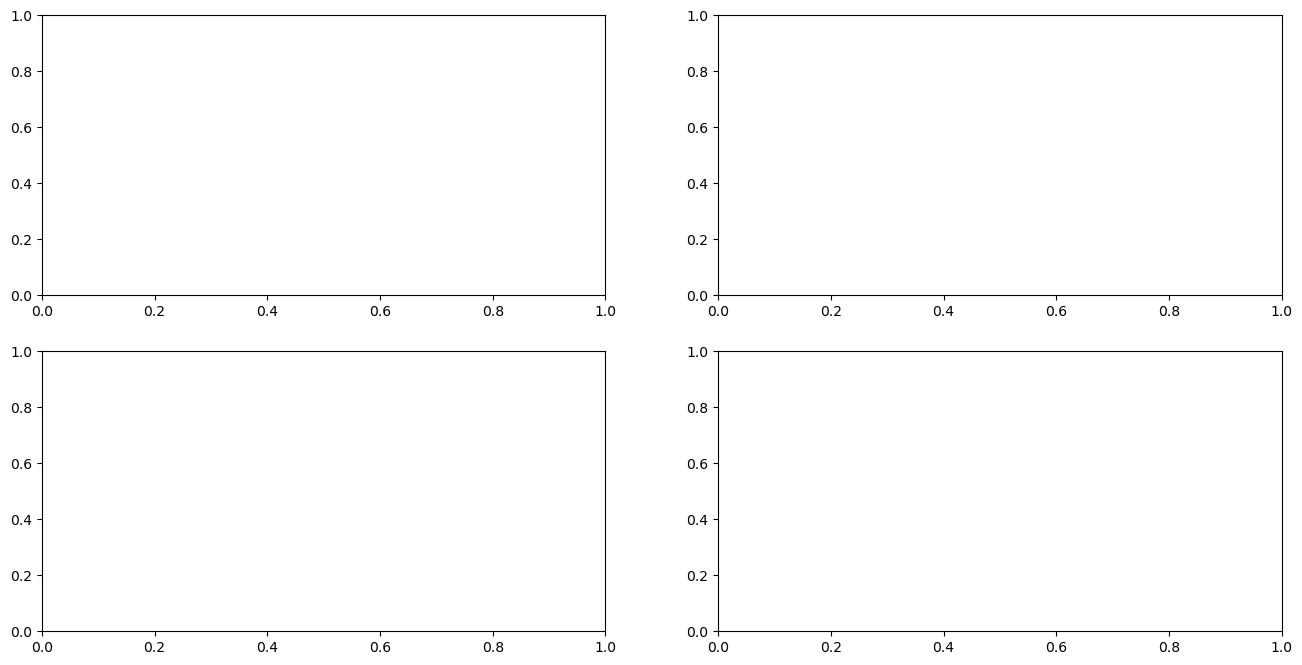

In [55]:
demo_grafico2.set_dataframe()
demo_grafico2.grafico_resumen()

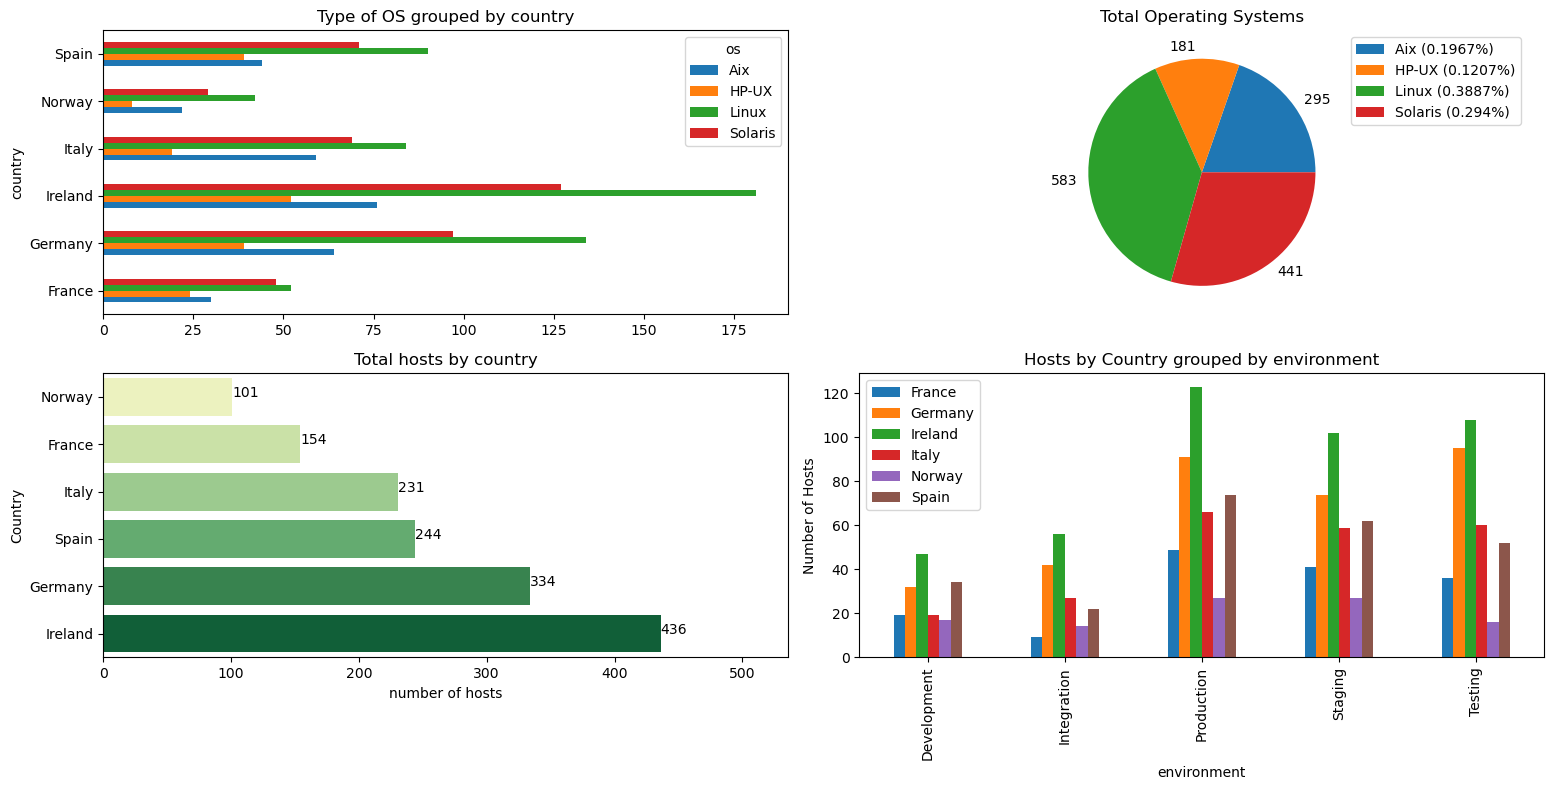

In [56]:
demo_grafico2 = PP(1500)
demo_grafico2.set_dataframe()
demo_grafico2.grafico_resumen()
#Puse el size de la figura para que se viese bien en mí computadora, no sé cómo se comporte en alguna otra

In [11]:
# Apliqué también un poco de herencia y mongo a la tarea. Te lo comento porque el import de Moongoclient
# me da problemas en Jupyter. En Pycharm sí funciona perfectamente
"""
import certifi
from pymongo import MongoClient

class PP_conMongo(PP):
    usuario = "testuser"
    password = "testpass"
    cluster = "cluster0.1g32scv.mongodb.net"
    params = "?retryWrites=true&w=majority"
    ca = certifi.where()

    #connection_string = f"mongodb+srv://{usuario}:{password}@{cluster}/{params}"
    #client = MongoClient(connection_string, tlsCAFile=ca)

    def mongo_connect(self,database_name):
        connection_string = f"mongodb+srv://{self.usuario}:{self.password}@{self.cluster}/{self.params}"
        client = MongoClient(connection_string, tlsCAFile = self.ca)

        return client[database_name]

    def uno_to_mongo(self):
        database = self.mongo_connect("listaUsuarios")
        collection = database["intento"]
        collection.insert_one(random.choice(self.dataset))

    def todo_to_mongo(self):
        database = self.mongo_connect("listaUsuarios")
        collection = database["intento_grande"]
        collection.insert_many(self.dataset)

    def retrieve_mongo(self):
        usuarios_en_mongo = []
        database = self.mongo_connect("listaUsuarios")
        collection = database["intento_grande"]

        for item in collection.find():
            usuarios_en_mongo.append(item)

        return usuarios_en_mongo
"""

'\nimport certifi\nfrom pymongo import MongoClient\n\nclass PP_conMongo(PP):\n    usuario = "testuser"\n    password = "testpass"\n    cluster = "cluster0.1g32scv.mongodb.net"\n    params = "?retryWrites=true&w=majority"\n    ca = certifi.where()\n\n    #connection_string = f"mongodb+srv://{usuario}:{password}@{cluster}/{params}"\n    #client = MongoClient(connection_string, tlsCAFile=ca)\n\n    def mongo_connect(self,database_name):\n        connection_string = f"mongodb+srv://{self.usuario}:{self.password}@{self.cluster}/{self.params}"\n        client = MongoClient(connection_string, tlsCAFile = self.ca)\n\n        return client[database_name]\n\n    def uno_to_mongo(self):\n        database = self.mongo_connect("listaUsuarios")\n        collection = database["intento"]\n        collection.insert_one(random.choice(self.dataset))\n\n    def todo_to_mongo(self):\n        database = self.mongo_connect("listaUsuarios")\n        collection = database["intento_grande"]\n        collection.

In [ ]:
"""
prueba = PP_conMongo(5)
prueba.uno_to_mongo()
prueba.todo_to_mongo()
print(prueba.retrieve_mongo())
"""